In [20]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

# Load OMXH25 Data
Convert ticker symbols to company names and reverse timeseries to begin from the oldest date.

In [101]:
df_25 = pd.read_csv('omxh25_closing_prices.csv', index_col='Date')
df_25.index = pd.to_datetime(df_25.index)
df_25_keys = pd.read_csv('omxh25_keys.csv')

col_name = []
for col in df_25.columns:
    col_name.append(df_25_keys.loc[df_25_keys['ticker'] == col, 'name'].values[0])

df_25 = pd.DataFrame(df_25.iloc[:,:].values, index=df_25.index, columns=col_name)
# Data must start from the beginning of the history!
df_25 = df_25[::-1]

'''
Training/Testing splits
'''
START_DATE = '2017-12-28'
SPLIT_DATE = '2021-12-28'
END_DATE = '2022-12-28'
df_25 = df_25.loc[START_DATE:END_DATE]
df_25_study = df_25.loc[:SPLIT_DATE]
df_25_test = df_25.loc[SPLIT_DATE:]

display(df_25_study)
print(df_25_study.info())

display(df_25_test)
print(df_25_test.info())

,Kesko,Huhtamäki,Elisa,Stora Enso,Wärtsilä,Qt Group,Valmet,Nordea Bank,Orion Corporation,Nokia,...,Neste,Kone,UPM,Telia Company,Sampo,Metso Outotec,SSAB B,Cargotec,TietoEVRY,Fortum
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-28,11.315,35.19,32.71,13.320,17.633,5.29,16.64,10.130,30.57,3.938,...,18.017,44.72,26.23,3.724,45.70,6.995,3.728,47.76,25.95,16.420
2017-12-29,11.313,35.00,32.72,13.220,17.533,5.21,16.44,10.100,31.08,3.894,...,17.783,44.78,25.91,3.724,45.80,7.100,3.714,47.20,25.98,16.500
2018-01-02,11.328,34.81,32.86,13.320,17.553,5.26,16.74,10.130,31.23,3.909,...,17.780,44.74,26.05,3.729,45.66,7.216,3.800,48.26,25.88,16.625
2018-01-03,11.220,34.97,32.69,13.375,17.973,5.44,16.82,10.150,31.95,3.993,...,18.073,45.15,26.17,3.755,45.58,7.326,3.891,48.94,26.20,16.730
2018-01-04,11.388,34.90,32.75,13.565,18.327,6.00,17.24,10.310,31.73,4.039,...,17.793,45.55,26.31,3.780,46.06,7.384,3.888,49.96,26.38,16.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,29.150,37.73,53.84,15.450,11.770,128.40,36.43,10.290,35.73,5.273,...,43.750,61.42,32.07,3.390,43.22,8.980,4.400,42.84,26.32,27.820
2021-12-22,29.350,37.95,53.58,15.575,12.105,134.00,36.65,10.296,35.76,5.393,...,43.720,62.22,32.61,3.370,43.20,9.144,4.428,43.30,26.64,27.720
2021-12-23,29.170,38.00,53.94,15.900,12.320,135.60,37.19,10.496,35.84,5.536,...,43.710,62.72,33.00,3.410,43.70,9.454,4.413,44.20,26.88,27.490


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2017-12-28 to 2021-12-28
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kesko              1004 non-null   float64
 1   Huhtamäki          1004 non-null   float64
 2   Elisa              1004 non-null   float64
 3   Stora Enso         1004 non-null   float64
 4   Wärtsilä           1004 non-null   float64
 5   Qt Group           1004 non-null   float64
 6   Valmet             1004 non-null   float64
 7   Nordea Bank        1004 non-null   float64
 8   Orion Corporation  1004 non-null   float64
 9   Nokia              1004 non-null   float64
 10  Metsä Board        1004 non-null   float64
 11  Kojamo             888 non-null    float64
 12  Outokumpu          1004 non-null   float64
 13  Nokian Tyres       1004 non-null   float64
 14  Konecranes         1004 non-null   float64
 15  Neste              1004 non-null   float64
 16  Kone  

,Kesko,Huhtamäki,Elisa,Stora Enso,Wärtsilä,Qt Group,Valmet,Nordea Bank,Orion Corporation,Nokia,...,Neste,Kone,UPM,Telia Company,Sampo,Metso Outotec,SSAB B,Cargotec,TietoEVRY,Fortum
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-28,29.60,38.62,54.52,16.115,12.525,135.40,38.00,10.806,36.31,5.627,...,43.94,63.36,33.35,3.460,44.57,9.448,4.527,44.58,27.52,27.160
2021-12-29,29.42,38.90,54.34,16.125,12.410,133.00,38.01,10.800,36.30,5.569,...,43.30,63.28,33.42,3.440,44.13,9.430,4.504,44.50,27.42,27.160
2021-12-30,29.34,38.89,54.12,16.140,12.360,133.60,37.72,10.786,36.52,5.574,...,43.36,63.04,33.46,3.452,44.06,9.348,4.452,43.84,27.48,26.990
2022-01-03,29.16,37.95,54.46,16.115,12.615,135.60,37.90,10.894,35.86,5.576,...,44.43,62.30,33.29,3.465,44.48,9.694,4.430,45.30,27.62,26.680
2022-01-04,29.20,38.76,54.90,16.495,13.135,131.80,38.21,11.096,35.89,5.542,...,45.01,62.42,33.89,3.469,45.16,9.916,4.504,46.52,27.66,26.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,20.83,32.81,49.78,13.495,7.990,43.99,25.53,9.996,53.42,4.382,...,44.55,48.31,35.85,2.413,48.92,9.688,5.068,41.84,26.98,16.180
2022-12-22,20.63,32.48,49.72,13.410,7.840,43.79,25.12,10.068,53.72,4.350,...,43.93,47.82,35.84,2.399,49.25,9.456,4.826,41.66,26.70,16.230
2022-12-23,20.71,32.64,49.87,13.425,7.900,44.16,25.22,10.054,53.22,4.364,...,43.89,48.21,35.65,2.399,49.73,9.628,4.847,41.62,26.86,15.880


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-12-28 to 2022-12-28
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kesko              254 non-null    float64
 1   Huhtamäki          254 non-null    float64
 2   Elisa              254 non-null    float64
 3   Stora Enso         254 non-null    float64
 4   Wärtsilä           254 non-null    float64
 5   Qt Group           254 non-null    float64
 6   Valmet             254 non-null    float64
 7   Nordea Bank        254 non-null    float64
 8   Orion Corporation  254 non-null    float64
 9   Nokia              254 non-null    float64
 10  Metsä Board        254 non-null    float64
 11  Kojamo             254 non-null    float64
 12  Outokumpu          254 non-null    float64
 13  Nokian Tyres       254 non-null    float64
 14  Konecranes         254 non-null    float64
 15  Neste              254 non-null    float64
 16  Kone   

# Plots some informative figures

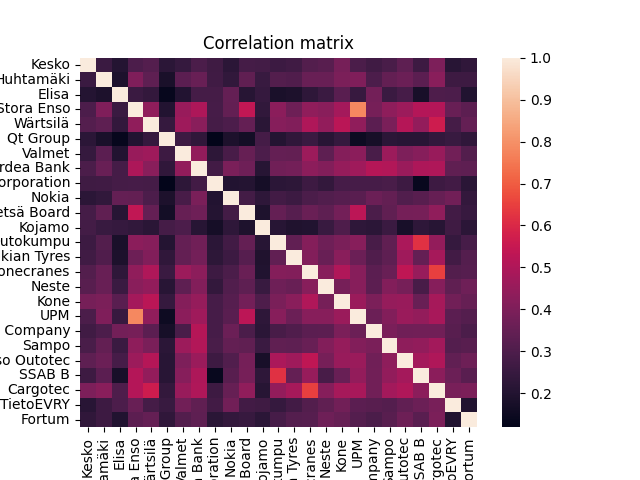

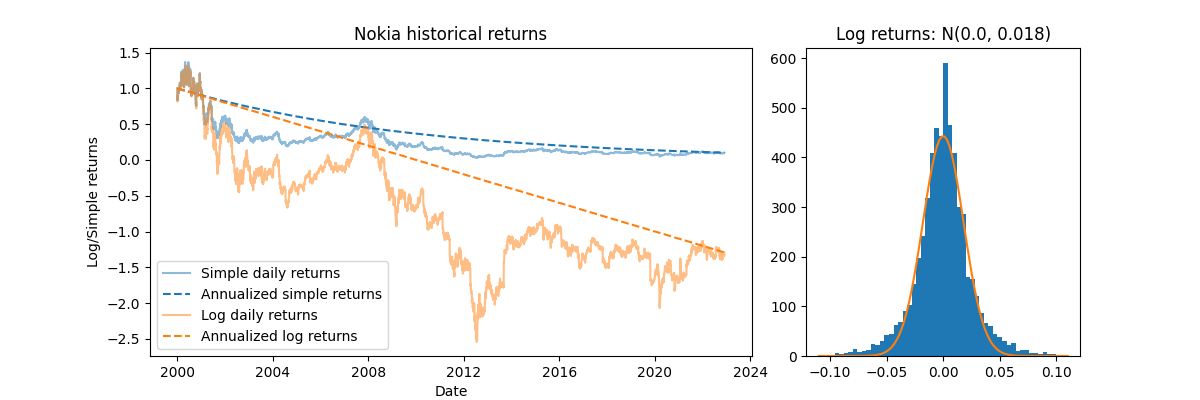

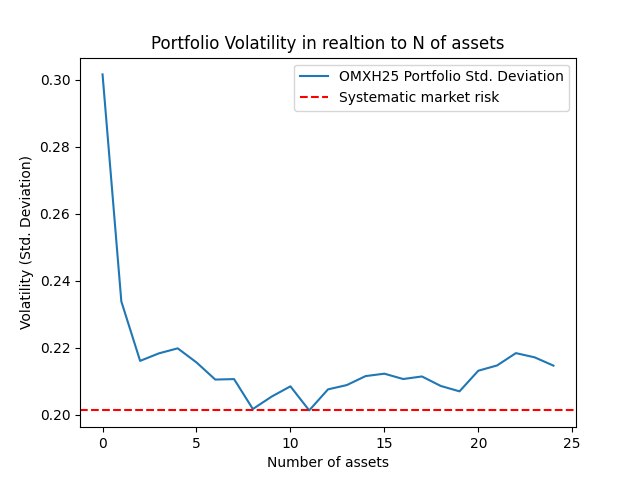

In [54]:
returns_daily = df_25.pct_change(periods=1)
returns_daily.iloc[0,:] = 0 # Fixes the first row from Nan to 0
log_returns = np.log(returns_daily+1)
log_returns_annual = log_returns.mean() * 252 #log returns are addative

cov_daily = log_returns.cov()
cov_annual = cov_daily * 252 # assuming dates are uncorrelated, variance is additive

# Correlation matrix
plt.figure('Correlation')
plt.clf()
sns.heatmap(log_returns.corr())
plt.title('Correlation matrix')
plt.show()

# Log vs simple returns
STOCK = 'Nokia'
plt.figure(STOCK)
plt.clf()

history = plt.subplot2grid((1,3), (0,0), colspan=2)
history.plot((returns_daily[STOCK]+1).cumprod(), color='C0', alpha=0.5, label='Simple daily returns')
avg_simple_day_change =  np.power(np.power((returns_daily[STOCK]+1).cumprod().iloc[-1]/1, 1/len(returns_daily.index)), range(len(returns_daily.index)))
history.plot(returns_daily.index, avg_simple_day_change, color='C0', linestyle='--', label='Annualized simple returns')

history.plot(log_returns[STOCK].cumsum() + 1, color='C1', alpha=0.5, label='Log daily returns')
avg_log_day_change = range(len(log_returns.index)) * log_returns[STOCK].mean() +1
history.plot(log_returns.index, avg_log_day_change, color='C1', linestyle='--', label='Annualized log returns')

history.legend()
history.set_xlabel('Date')
history.set_ylabel('Log/Simple returns') 
history.set_title(f'{STOCK} historical returns')

dist = plt.subplot2grid((1,3), (0,2), colspan=1)
dist.hist(log_returns[STOCK], bins=50, range=[-0.1, 0.1])
xmin, xmax = dist.get_xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = 0, 0.018
p = norm.pdf(x, mu, std)*20
dist.plot(x, p)
dist.set_title(f'Log returns: N({mu:.1f}, {std:.3f})')
plt.gcf().set_size_inches((12,4))
plt.show()

# Portfolio Volatility in realtion to N of assets
num_assets = len(df_25.columns)
assets = np.zeros(num_assets)
n_vola = []
for i in range(num_assets):
    assets[i] = 1
    weights = np.divide(assets, np.sum(assets))
    port_vola = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    n_vola.append(port_vola)

plt.figure('Portfolio Standard Deviation')
plt.clf()
plt.plot(n_vola, color='C0', label='OMXH25 Portfolio Std. Deviation')
plt.axhline(min(n_vola), color='red', linestyle='--', label='Systematic market risk')
plt.legend()
plt.xlabel('Number of assets')
plt.ylabel('Volatility (Std. Deviation)') 
plt.title('Portfolio Volatility in realtion to N of assets')

plt.subplots_adjust(wspace=0.5)
plt.show()

# MC efficient frontier function

In [57]:
def mc_efficient_frontier(df, num_iterations=500000, min_assets=1):

    returns_daily = df.pct_change(periods=1)+1
    returns_daily.iloc[0,:] = 1 # Fixes the first row from Nan to 1
    log_returns = np.log(returns_daily)
    log_returns_annual = log_returns.mean() * 252 #log returns are addative

    cov_daily = log_returns.cov()
    cov_annual = cov_daily * 252 # assuming dates are uncorrelated, variance is additive

    port_returns = []
    port_volatility = []
    port_sharpe = []
    port_weights = []
    asset_returns = []
    asset_volatility = []
    num_assets = len(df.columns)

    for i in range(num_iterations):

        # Compute random sized portfolio with random assets
        random_portfolio_size = np.random.randint(min_assets, num_assets+1)
        random_assets = np.random.choice(num_assets, size=random_portfolio_size, replace=False)
        # Copmute random normalized weights for each asset
        weights = np.zeros(num_assets)
        weights[random_assets] = np.random.random(random_portfolio_size)
        weights = np.divide(weights, np.sum(weights))
        port_weights.append(weights)

        # Copmutes historical log return of portfolio
        returns = np.dot(weights, log_returns_annual)
        port_returns.append(returns)

        # Copmutes historical volatility of portfolio
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
        port_volatility.append(volatility)
        port_sharpe.append(returns / volatility)


    # Get actual asset values
    for i in range(num_assets):
        weights = np.zeros(num_assets)
        weights[i] = 1
        returns = np.dot(weights, log_returns_annual) 
        asset_returns.append(returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
        asset_volatility.append(volatility)

    # Final dictionary
    portfolios = {'Returns': port_returns,
                'Volatility': port_volatility,
                'Weights': port_weights,
                'Sharpe': port_sharpe,
                'OptimalReturn': port_returns[np.argmax(port_sharpe)],
                'OptimalVolatility': port_volatility[np.argmax(port_sharpe)],
                'OptimalWeights': port_weights[np.argmax(port_sharpe)],
                'VarianceReturn': port_returns[np.argmin(port_volatility)],
                'VarianceVolatility': port_volatility[np.argmin(port_volatility)],
                'VarianceWeights': port_weights[np.argmin(port_volatility)],
                'Assets': df.columns.tolist(),
                'AssetReturns': asset_returns,
                'AssetVolatility': asset_volatility}

    return portfolios

# OMXH25 vs highly correlated basket

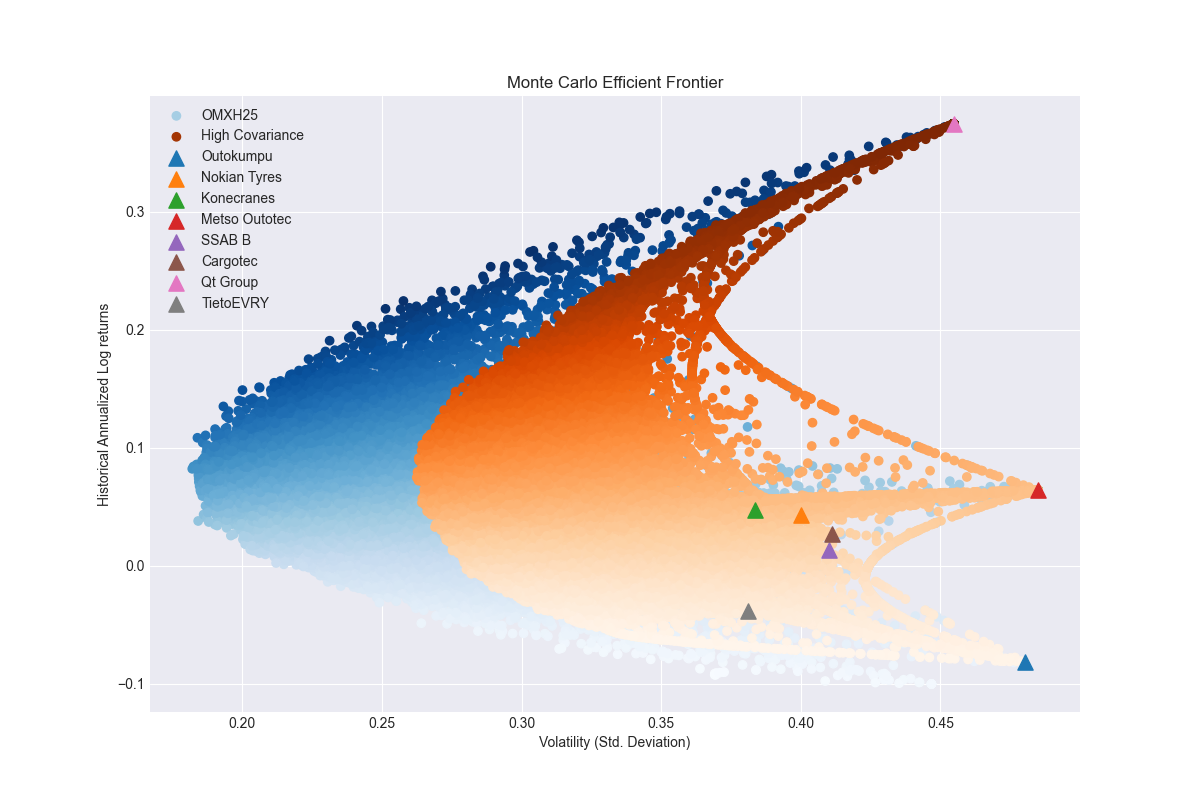

In [201]:
plt.figure('Efficient Frontier Compare' ,figsize=(12, 8))
plt.style.use('seaborn-v0_8-darkgrid')
plt.cla()

portfolios = mc_efficient_frontier(df_25, 150000)
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe'], cmap='Blues', label='OMXH25')

portfolios = mc_efficient_frontier(df_25.iloc[:,[12, 13, 14, 20, 21, 22, 5, 23]], 60000)
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe'], cmap='Oranges', label='High Covariance')

plt.rcParams["image.cmap"] = 'hsv'
colors  = plt.cm.get_cmap('hsv', len(portfolios['Assets']))
for i in range(len(portfolios['Assets'])):
    plt.scatter(portfolios['AssetVolatility'][i], portfolios['AssetReturns'][i], marker='^', s=120, label=portfolios['Assets'][i])

plt.legend()
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Historical Annualized Log returns') 
plt.title('Monte Carlo Efficient Frontier')
plt.show()

# Efficient frontier

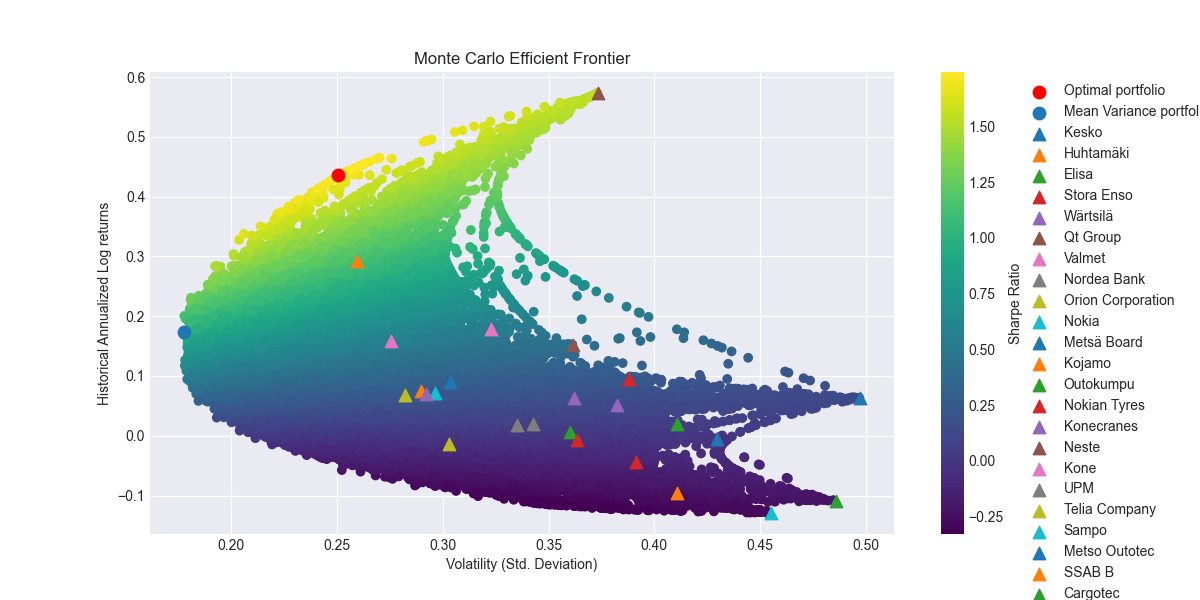

Maximum Sharpe: 1.7449098076143883
Obtained with weights:
Asset: Qt Group        Weight: 0.54
Asset: Kojamo          Weight: 0.39
Asset: Kone            Weight: 0.06


In [60]:
plt.figure('Efficient Frontier')
plt.clf()
plt.gcf().set_size_inches((12,6))
plt.style.use('seaborn-v0_8-darkgrid')

portfolios = mc_efficient_frontier(df_25_study, min_assets=2)
sc = plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe'], cmap='viridis')
plt.colorbar(sc).set_label('Sharpe Ratio')

plt.scatter(portfolios['OptimalVolatility'], portfolios['OptimalReturn'], c='red', s=80, label='Optimal portfolio')
plt.scatter(portfolios['VarianceVolatility'], portfolios['VarianceReturn'], c='C0', s=80, label='Mean Variance portfolio')

for i in range(len(portfolios['Assets'])):
    plt.scatter(portfolios['AssetVolatility'][i], portfolios['AssetReturns'][i], marker='^', s=80, label=portfolios['Assets'][i])

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), fancybox=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Historical Annualized Log returns') 
plt.title('Monte Carlo Efficient Frontier')
plt.show()

print('Maximum Sharpe: ' + str(max(portfolios['Sharpe'])))
print('Obtained with weights:')
for i in range(len(portfolios['OptimalWeights'])):
    if portfolios['OptimalWeights'][i] != 0:
        print('Asset: {a:15s} Weight: {w:.2f}'.format(a=portfolios['Assets'][i], w=portfolios['OptimalWeights'][i]))



# Relation between portfolio size and computed values

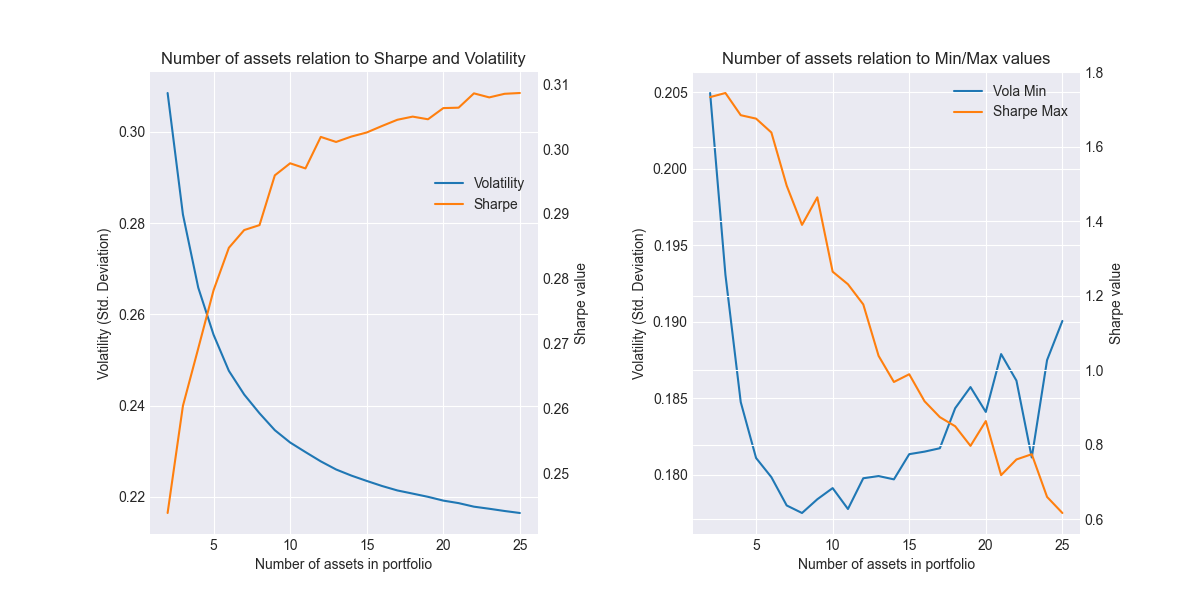

In [77]:
n_assets = np.count_nonzero(portfolios['Weights'], axis=1)

df = pd.DataFrame(n_assets , columns=['Assets'])
df['Vola'] = portfolios['Volatility']
df['Sharpe'] = portfolios['Sharpe']
df = df.set_index('Assets')

df = df.groupby('Assets').agg(Sharpe=('Sharpe', 'mean'), 
                            SharpeMax=('Sharpe', 'max'), 
                            Vola=('Vola', 'mean'),
                            VolaMin=('Vola', 'min'))

fig = plt.figure('Asset number std sharpe')
fig.set_figheight(6)
fig.set_figwidth(12)
plt.clf()
plt.subplot(1, 2, 1)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.Vola, color='C0', label='Volatility')
ax2.plot(df.Sharpe, color='C1', label='Sharpe')

ax1.plot(np.nan, 'C1', label = 'Sharpe')
ax1.legend(bbox_to_anchor=(1,0.8))
ax1.set_xlabel('Number of assets in portfolio')
ax1.set_ylabel('Volatility (Std. Deviation)')
ax2.set_ylabel('Sharpe value')
ax2.grid(None)
plt.title('Number of assets relation to Sharpe and Volatility')


plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.4)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.VolaMin, color='C0', label='Vola Min')
ax2.plot(df.SharpeMax, color='C1', label='Sharpe Max')

ax1.plot(np.nan, 'C1', label = 'Sharpe Max')
ax1.legend()
ax1.set_xlabel('Number of assets in portfolio')
ax1.set_ylabel('Volatility (Std. Deviation)')
ax2.set_ylabel('Sharpe value')
plt.title('Number of assets relation to Min/Max values')
plt.show()


# Backtesting

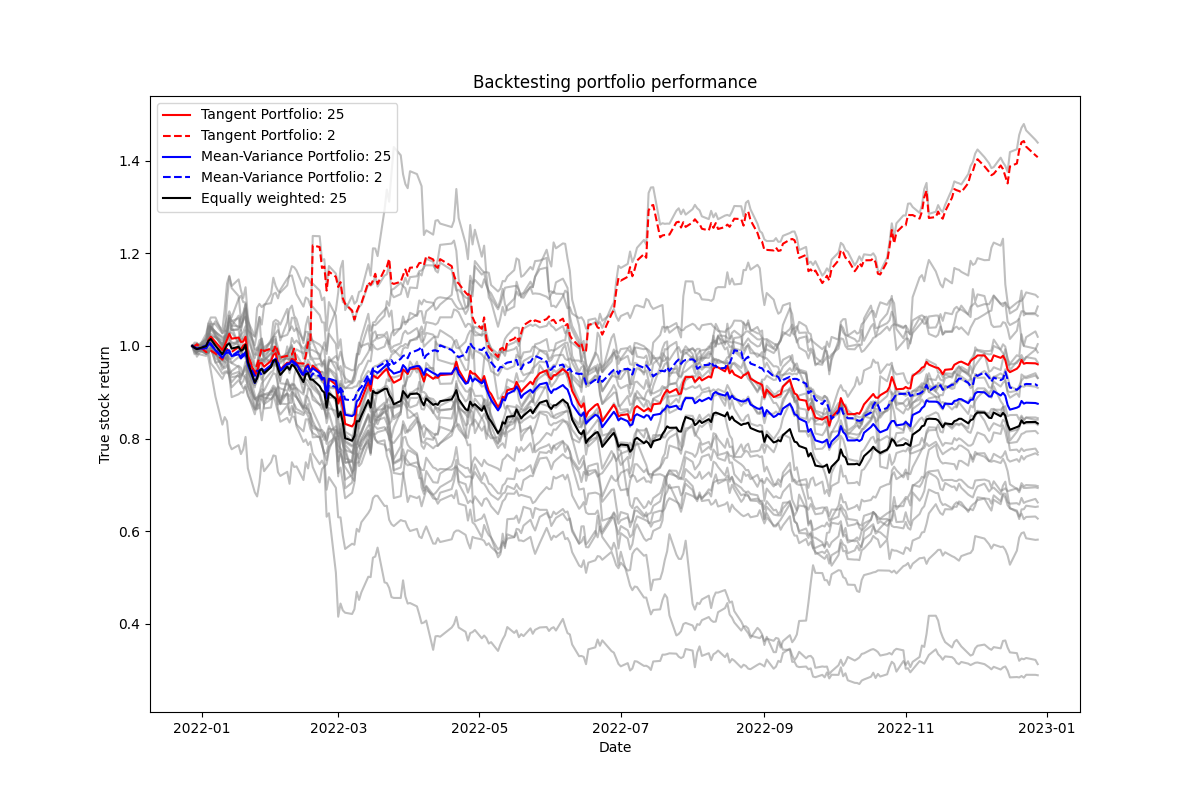

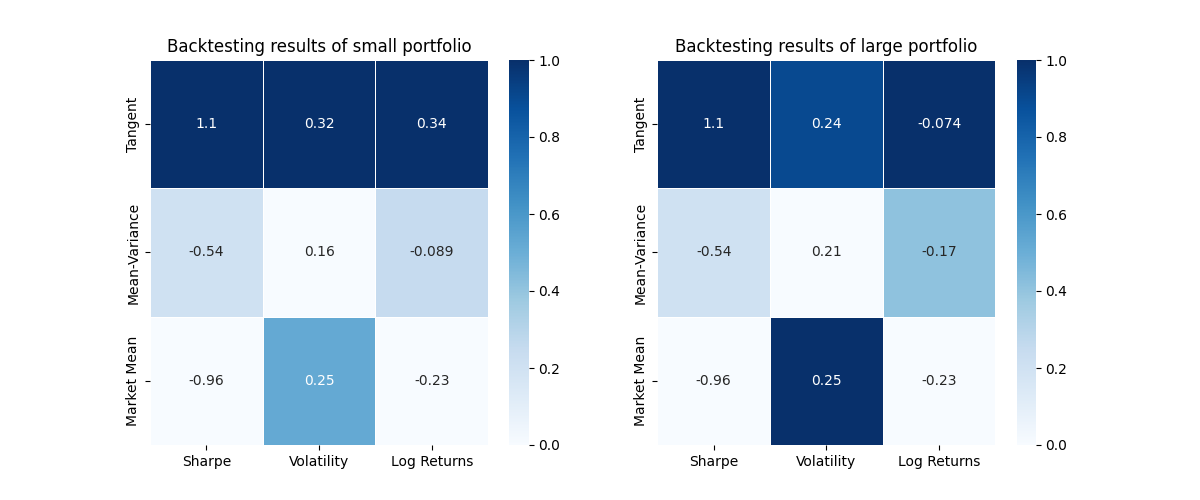

In [102]:
small_port = mc_efficient_frontier(df_25_study, num_iterations=100000, min_assets=2)
large_port = mc_efficient_frontier(df_25_study, num_iterations=100000, min_assets=25)
returns_daily = df_25_test.pct_change(periods=1)+1
returns_daily.iloc[0,:] = 1 # Fixes the first row from Nan to 1
cumulative_returns = returns_daily.cumprod()

'''
Plotting
'''
plt.figure('Backtesting' ,figsize=(12, 8))
plt.clf()
plt.style.use('default')

# Stocks
plt.plot(returns_daily.cumprod(), color='grey', alpha=0.5)

# Large Optimal portfolio
weighted_returns = cumulative_returns.multiply(large_port['OptimalWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='red', label=f'Tangent Portfolio: ' + str(np.count_nonzero(large_port['OptimalWeights'])))

# Small Optimal portfolio
weighted_returns = cumulative_returns.multiply(small_port['OptimalWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='red', linestyle='--', label=f'Tangent Portfolio: ' + str(np.count_nonzero(small_port['OptimalWeights'])))

# Large Mean-Variance Portfolio
weighted_returns = cumulative_returns.multiply(large_port['VarianceWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='blue', label=f'Mean-Variance Portfolio: ' + str(np.count_nonzero(large_port['VarianceWeights'])))

# Small Mean-Variance Portfolio
weighted_returns = cumulative_returns.multiply(small_port['VarianceWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='blue', linestyle='--', label=f'Mean-Variance Portfolio: ' + str(np.count_nonzero(small_port['VarianceWeights'])))

# Equal Weight Portfolio
weights = np.ones(len(df_25_study.columns)) 
weights = weights / np.sum(weights)
weighted_returns = cumulative_returns.multiply(weights ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='black', label='Equally weighted: 25')

plt.legend()
plt.xlabel('Date')
plt.ylabel('True stock return')
plt.title(f'Backtesting portfolio performance')
plt.show()


'''
Results
'''
fig = plt.figure('Results')
plt.clf()
fig.set_figheight(5)
fig.set_figwidth(12)

# Mean results
log_returns = np.log(returns_daily)
log_returns_annual = log_returns.mean() * 252 #log returns are addative
cov_daily = log_returns.cov()
cov_annual = cov_daily * 252 # assuming dates are uncorrelated, variance is additive
weights = [1]*len(df_25_study.columns)
weights = weights / np.sum(weights)
mean_returns = np.dot(weights, log_returns_annual)
mean_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
mean_sharpe = mean_returns / mean_volatility

# Small Optimal portfolio
weights = small_port['OptimalWeights'] 
weights = weights / np.sum(weights)
optimal_returns = np.dot(weights, log_returns_annual)
optimal_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
optimal_sharpe = optimal_returns / optimal_volatility

# Small Variance results
weights = small_port['VarianceWeights'] 
weights = weights / np.sum(weights)
variance_returns = np.dot(weights, log_returns_annual)
variance_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
variance_sharpe = variance_returns / variance_volatility

# Large Optimal portfolio
weights = large_port['OptimalWeights'] 
weights = weights / np.sum(weights)
large_optimal_returns = np.dot(weights, log_returns_annual)
large_optimal_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
large_optimal_sharpe = optimal_returns / optimal_volatility

# Large Variance results
weights = large_port['VarianceWeights'] 
weights = weights / np.sum(weights)
large_variance_returns = np.dot(weights, log_returns_annual)
large_variance_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
large_variance_sharpe = variance_returns / variance_volatility

plt.subplot(1, 2, 1)
stats = ['Sharpe', 'Volatility', 'Log Returns']
groups = ['Tangent', 'Mean-Variance', 'Market Mean']
values = np.array([[optimal_sharpe, optimal_volatility, optimal_returns],
                    [variance_sharpe, variance_volatility, variance_returns],
                    [mean_sharpe, mean_volatility, mean_returns]])

df = pd.DataFrame(data=values, index=groups, columns=stats)
scaled_df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
sns.heatmap(scaled_df, annot=df, linewidths=0.5, cmap='Blues')
plt.title(f'Backtesting results of small portfolio')

plt.subplot(1, 2, 2)
stats = ['Sharpe', 'Volatility', 'Log Returns']
groups = ['Tangent', 'Mean-Variance', 'Market Mean']
values = np.array([[large_optimal_sharpe, large_optimal_volatility, large_optimal_returns],
                    [large_variance_sharpe, large_variance_volatility, large_variance_returns],
                    [mean_sharpe, mean_volatility, mean_returns]])

df = pd.DataFrame(data=values, index=groups, columns=stats)
scaled_df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
sns.heatmap(scaled_df, annot=df, linewidths=0.5, cmap='Blues')
plt.title(f'Backtesting results of large portfolio')

plt.show()